In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.metrics import r2_score
# r2_score(Y , y_pred )
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/colab_drive/RegData.csv" , header=None)

In [ ]:
data.values

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [ ]:
data.columns = ["A","B"]
data.head(10)

,A,B
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


## Single Variable Linear Regression
### Use BFGS Method to optimize a LR model for the data provided in the attached file.
### Use Multivariable gradient descent to solve the same problem.
### Evaluate Gradient descent solution and BFGS solution using r2_score.
### Plot the following curves:
#### - Cost vs. iterations.
#### - Cost vs. each parameter.
### Find the solution using sklearn.linear_model.LinearRegression model.
### Compare the results from Gradient descent, BFGS, and sklearn models. Write your conclusion in brief.

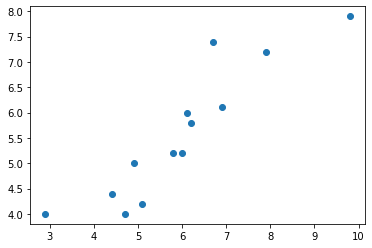

In [ ]:
X = data["A"].values
Y = data["B"].values # using capital y instead of small one to distingish the B_inverse equation in BFGS function
plt.scatter(X , Y)

In [ ]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [ ]:
def BFGS(x0 , x1 ,fun1_d , alpha = 1):
    x_list = [x0 , x1]
    delta_x  = (x_list[1] - x_list[0]).reshape(-1 , 1)
    y = (fun1_d(x1) - fun1_d(x0)).reshape(-1,1)
    vect = x1
    B_initial = np.eye(2)
    vect_list = [x1]
    for i in range(1, 100):
                       # I                                                          # I 
        B_inverse = ((np.eye(2) - (delta_x @ y.T) / (y.T @ delta_x)) @ B_initial @ (np.eye(2) - (y @ delta_x.T) / (y.T @ delta_x)))  + ((delta_x @ delta_x.T) / (y.T @ delta_x))
        # print(B_inverse)
        vect = np.array(vect) - B_inverse @ fun1_d(vect) * alpha
        # print(vect)
        vect_list.append(vect)
        if np.linalg.norm(fun1_d(vect)) < 0.001:
            break
        delta_x = (vect_list[-1] - vect_list[-2]).reshape(-1 , 1)
        y = (fun1_d(vect_list[-1]) - fun1_d(vect_list[-2])).reshape(-1 , 1)
        B_initial = B_inverse
    print("final vector : " , vect, " and no of iteration : ", i, " gred :  " ,fun1_d(vect) )
    return vect_list
    

In [ ]:
m = len(X)
# h_theta = vect[0] + vect[1]* X
# gred0 = (1/m)*np.sum(h_theta - Y)
# gred1 = (1/m)*np.sum((h_theta - Y) * X)

In [ ]:
def fun_d(vect):
  h_theta = vect[0] + vect[1]* X
  return np.array([(1/m)*np.sum(h_theta - Y),  (1/m)*np.sum((h_theta - Y) * X)])

In [ ]:
x1 = np.array([0.02,0.13])
x0 = np.array([0,0])

### Use BFGS Method to optimize a LR model for the data provided in the attached file.

In [ ]:
st= time.time()
paramter = BFGS(x0 , x1 ,fun_d , 0.1 )
ft = time.time()
bfgs_time = ft - st
# print(bfgs_time)

final vector :  [1.42158052 0.69649411]  and no of iteration :  73  gred :   [-0.00083143  0.00038411]


In [ ]:
# paramter

13

In [ ]:
parameter = np.array(paramter)
cost,theta0,theta1=[],[],[]
for i in range(len(parameter)):
  h_theta = parameter[i][0]+ parameter[i][1]*X
  cost.append((1/(2*m))*np.sum(np.square(h_theta - Y)))
  theta0.append(parameter[i][0])
  theta1.append(parameter[i][1])



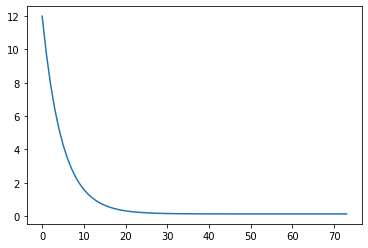

In [ ]:
plt.plot(cost)

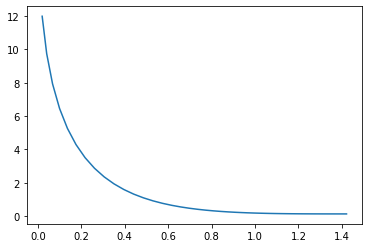

In [ ]:
plt.plot(theta0,cost)

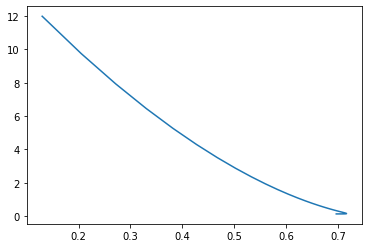

In [ ]:
plt.plot(theta1,cost)

In [ ]:
y_pred = 1.42158052 + 0.69649411*X
bfgs_score = r2_score(Y , y_pred)

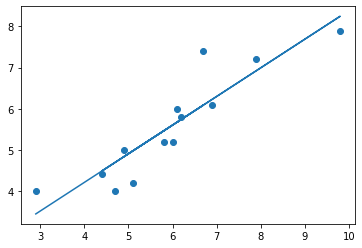

In [ ]:
plt.scatter(X , Y)
plt.plot(X , y_pred)

## Use Multivariable gradient descent to solve the same problem.

In [ ]:
# I implemented both multi and batch gd

In [ ]:
# vect = np.array([10 ,10])
def Multi_GD(fun_d , vect_0 ,alpha):
    vect_list = [vect_0]
    for i in range(1 , 1000):
        new_vect = vect_0 - alpha * fun_d(vect_0)
        vect_list.append(new_vect)
        if np.linalg.norm(fun_d(vect_list[-1])) < 0.001: break
        vect_0 = new_vect
    print("iteration",i-1 , vect_list[-1], "gred: ", fun_d(vect_list[-1]))
    

In [ ]:
st= time.time()
Multi_GD(fun_d ,x0 , 0.001 )
ft = time.time()
multigd_time = ft - st



iteration 998 [0.22688664 0.88321234] gred:  [-0.08383369  0.01310279]


In [ ]:
y_pred = 0.22688664 + 0.88321234*X
multi_score = r2_score(Y , y_pred)

In [ ]:
def Batch(X , Y , alpha , epoch):
    theta0 = theta1 = 0 
    thetas0 = []
    thetas1 = []
    costs = []
    m= len(X)
    for i in range(epoch):
        h_theta = theta0+theta1*X
        j_theta = (1/(2*m))*np.sum(np.square(h_theta - Y))
        costs.append(j_theta)
        gred0 = (1/m)*np.sum(h_theta - Y)
        gred1 = (1/m)*np.sum((h_theta - Y) * X)
        gred_vector = np.array([gred0,gred0])
        if np.linalg.norm(np.array([gred0,gred1])) < 0.02: break
#         if (i > 0) and (np.abs(costs[i] - costs[i-1])< 0.00001): break
        theta0 = theta0 - (alpha * gred0)
        theta1 = theta1 - (alpha * gred1)
        thetas0.append(theta0)
        thetas1.append(theta1)
        if i == (epoch - 1):
            j_theta = (1/(2*m))*np.sum(np.square((theta0+theta1*X) - Y))

    return theta0 , theta1 , costs, thetas0, thetas1

In [ ]:
st= time.time()
intercept , coef , costs, thetas0 , thetas1 = Batch(X , Y , 0.001, 1000)
ft = time.time()
batch_time = ft - st
# print(batch_time)
intercept  , coef 

(0.22697046994915773, 0.8831992393695128)

In [ ]:
y_pred = 0.22697046994915773 + 0.8831992393695128*X
batch_score = r2_score(Y , y_pred)

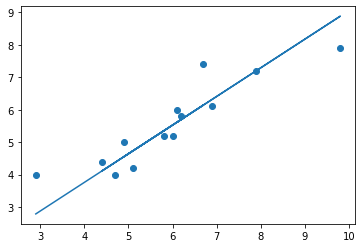

In [ ]:
plt.scatter(X , Y)
plt.plot(X , y_pred)

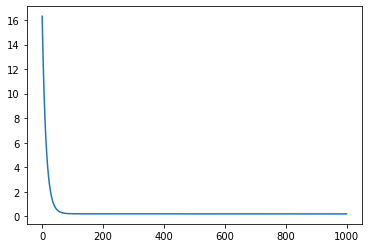

In [ ]:
plt.plot(costs)

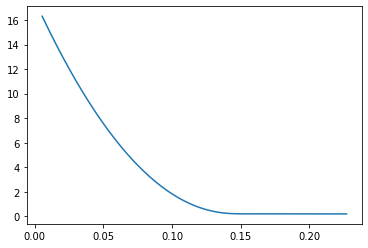

In [ ]:
plt.plot(thetas0, costs)

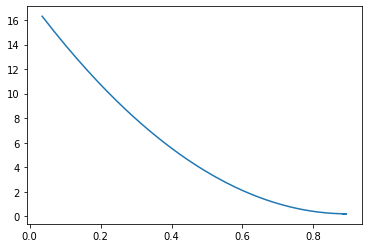

In [ ]:
plt.plot(thetas1, costs)

### Find the solution using sklearn.linear_model.LinearRegression model.


In [ ]:
from sklearn.linear_model import LinearRegression
st= time.time()
reg = LinearRegression().fit(X.reshape(-1,1), Y)
ft = time.time()
sklearn_time = ft - st
print(sklearn_time)
reg.coef_ , reg.intercept_

0.014523029327392578


(array([0.69452919]), 1.4341107664655004)

In [ ]:
y_pred = 1.4341107664655004 + 0.69452919*X
sklearn_core = r2_score(Y , y_pred)

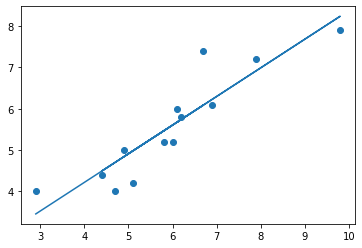

In [ ]:
plt.scatter(X , Y)
plt.plot(X , y_pred)

### Compare the results from Gradient descent, BFGS, and sklearn models. Write your conclusion in brief.

In [ ]:
from prettytable import PrettyTable

In [ ]:
myTable = PrettyTable([" type", "time consumed" , "re_score"])
myTable.add_row([" BFGS",bfgs_time ,bfgs_score ])
myTable.add_row([" Multi_GD",multigd_time,multi_score ])
myTable.add_row([" Batch_GD ",batch_time, batch_score ])
myTable.add_row([" SKLEARN",sklearn_time,sklearn_core ])

print(myTable)

+------------+----------------------+--------------------+
|    type    |    time consumed     |      re_score      |
+------------+----------------------+--------------------+
|    BFGS    | 0.013948678970336914 | 0.8213086704633954 |
|  Multi_GD  | 0.17014741897583008  | 0.756290675797065  |
|  Batch_GD  | 0.06751465797424316  | 0.7562997061628611 |
|   SKLEARN  | 0.014523029327392578 | 0.8213156778363773 |
+------------+----------------------+--------------------+


In [ ]:
# BFGS is much similar to sklearn implementation ang get close score
# For multiGD it need more much epochs to reach min than BFGS
